**Linearly Seperable data**

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sn

In [170]:
# Import training datasets
class_1_train = pd.read_csv('linearSep/class1_train.txt', sep = ' ', names = ['Col_1','Col_2'])
class_1_train['Class'] = 0
class_2_train = pd.read_csv('linearSep/class2_train.txt', sep = ' ', names = ['Col_1','Col_2'])
class_2_train['Class'] = 1
class_3_train = pd.read_csv('linearSep/class3_train.txt', sep = ' ', names = ['Col_1','Col_2'])
class_3_train['Class'] = 2


In [171]:
# Merge all the classes to create a single dataset
train_arr = [class_1_train, class_2_train, class_3_train]
train = pd.concat(train_arr, ignore_index = True)

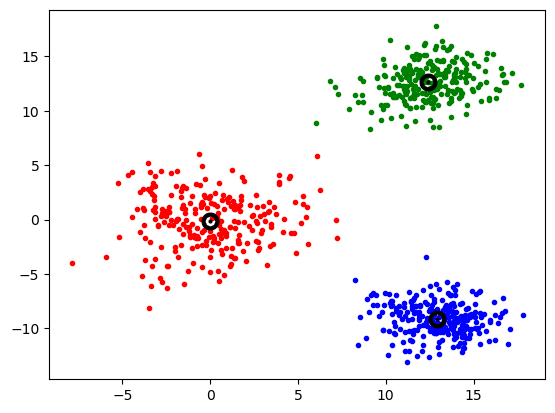

In [172]:
# Plot for class 1 and its mean
plt.scatter(class_1_train['Col_1'], class_1_train['Col_2'], color = "red", marker = ".")
plt.scatter(class_1_train['Col_1'].mean() , class_1_train['Col_2'].mean() , color = "black", marker = "." , linewidth = 10)

# Plot for class 2 and its mean
plt.scatter(class_2_train['Col_1'], class_2_train['Col_2'], color = "green", marker = ".")
plt.scatter(class_2_train['Col_1'].mean() , class_2_train['Col_2'].mean() , color = "black", marker = "." , linewidth = 10)

# Plot for class 3 and its mean
plt.scatter(class_3_train['Col_1'], class_3_train['Col_2'], color = "blue", marker = ".")
plt.scatter(class_3_train['Col_1'].mean() , class_3_train['Col_2'].mean() , color = "black", marker = "." , linewidth = 10)
plt.savefig('NNLinearlySep.png')


In [173]:
# Import validation datasets
class_1_val = pd.read_csv('linearSep/class1_val.txt', sep = ' ', names = ['Col_1','Col_2'])
class_1_val['Class'] = 0
class_2_val = pd.read_csv('linearSep/class2_val.txt', sep = ' ', names = ['Col_1','Col_2'])
class_2_val['Class'] = 1
class_3_val = pd.read_csv('linearSep/class3_val.txt', sep = ' ', names = ['Col_1','Col_2'])
class_3_val['Class'] = 2

In [174]:
# Merge all the classes to create a single dataset
val = pd.concat((class_1_val, class_2_val, class_3_val), ignore_index = True)

In [175]:
# Import testing dataset
class_1_test = pd.read_csv('linearSep/class1_test.txt', sep = ' ', names = ['Col_1','Col_2'])
class_1_test['Class'] = 0
class_2_test = pd.read_csv('linearSep/class2_test.txt', sep = ' ', names = ['Col_1','Col_2'])
class_2_test['Class'] = 1
class_3_test = pd.read_csv('linearSep/class3_test.txt', sep = ' ', names = ['Col_1','Col_2'])
class_3_test['Class'] = 2

In [176]:
# Merge all the classes to create a single dataset
test = pd.concat((class_1_test, class_2_test, class_3_test), ignore_index = True)

In [177]:
# Seperating input and output for classifier
input_train = train.drop(['Class'], axis='columns')
output_train = train.Class

input_test = test.drop(['Class'], axis='columns')
output_test = test.Class

In [178]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [179]:
K=1 #nearest neighbour classifier
knn = KNeighborsClassifier(n_neighbors=K)

In [180]:
print(knn.fit(input_train , output_train))
print("score: ",knn.score(input_test , output_test))

KNeighborsClassifier(n_neighbors=1)
score:  1.0


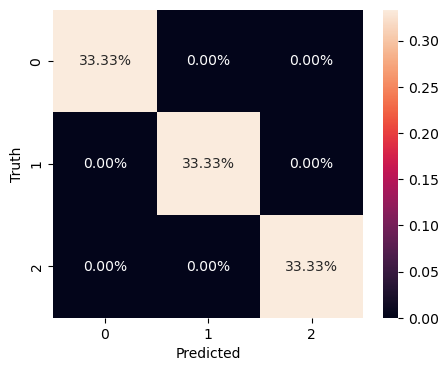

In [181]:
# Build confusion matrix
output_predict = knn.predict(input_test)
# confusion_matrix(truth,prediction)
cm = confusion_matrix(output_test , output_predict)
plt.figure(figsize=(5,4))
sn.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.savefig('NNLinearlySepConf.png')


In [182]:
print(classification_report(output_test , output_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       100
           2       1.00      1.00      1.00       100

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [183]:
a = np.arange(start=input_train.iloc[:,0].min()-1, stop=input_train.iloc[:,0].max()+1, step=0.1)
b = np.arange(start=input_train.iloc[:,1].min()-1, stop=input_train.iloc[:,1].max()+1, step=0.1)

XX_train , YY_train = np.meshgrid(a,b)
train_input_array = np.array([XX_train.ravel(),YY_train.ravel()]).T


C:\Users\bryso\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


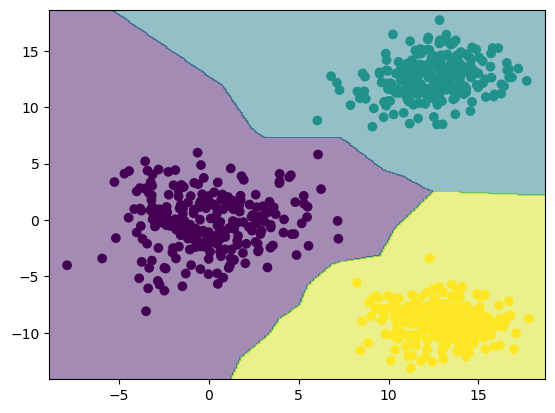

In [184]:
train_labels = knn.predict(train_input_array)
plt.contourf(XX_train,YY_train,train_labels.reshape(XX_train.shape), alpha = 0.5)
plt.scatter(input_train['Col_1'],input_train['Col_2'],c = output_train)
plt.savefig('NNLinearlySepTrain.png')

C:\Users\bryso\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


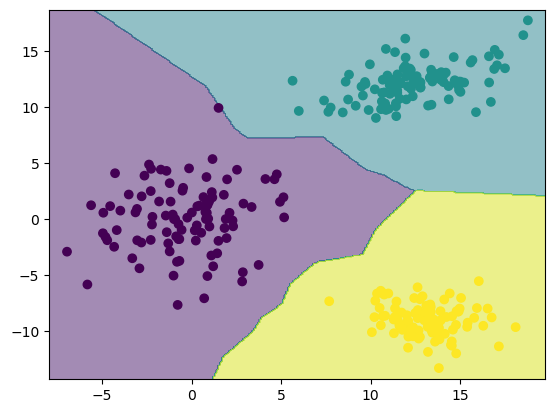

In [185]:
a = np.arange(start=input_test.iloc[:,0].min()-1, stop=input_test.iloc[:,0].max()+1, step=0.1)
b = np.arange(start=input_test.iloc[:,1].min()-1, stop=input_test.iloc[:,1].max()+1, step=0.1)

XX_test , YY_test = np.meshgrid(a,b)
test_input_array = np.array([XX_test.ravel(),YY_test.ravel()]).T
test_labels = knn.predict(test_input_array)
plt.contourf(XX_test,YY_test,test_labels.reshape(XX_test.shape), alpha = 0.5)
plt.scatter(input_test['Col_1'],input_test['Col_2'],c = output_test)
plt.savefig('NNLinearlySepTest.png')

#

**non-Linearly Seperable data**

In [186]:
# Import training datasets
class_1_train = pd.read_csv('nonlinearSep/class1_train.txt', sep = ' ', names = ['Col_1','Col_2'])
class_1_train['Class'] = 0
class_2_train = pd.read_csv('nonlinearSep/class2_train.txt', sep = ' ', names = ['Col_1','Col_2'])
class_2_train['Class'] = 1

In [187]:
# Merge all the classes to create a single dataset
train_arr = [class_1_train, class_2_train]
train = pd.concat(train_arr, ignore_index = True)

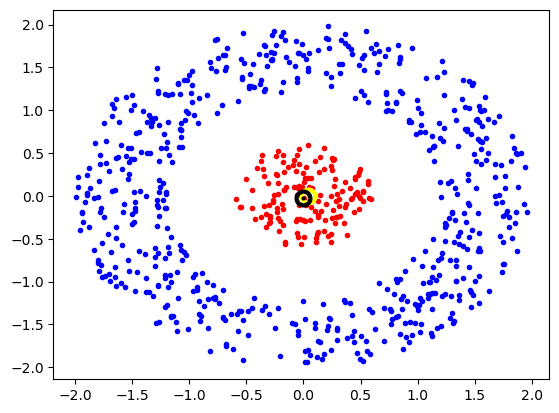

In [188]:
# Plot for class 1 and its mean
plt.scatter(class_1_train['Col_1'], class_1_train['Col_2'], color = "red", marker = ".")
plt.scatter(class_1_train['Col_1'].mean() , class_1_train['Col_2'].mean() , color = "yellow", marker = "." , linewidth = 10)

# Plot for class 2 and its mean
plt.scatter(class_2_train['Col_1'], class_2_train['Col_2'], color = "blue", marker = ".")
plt.scatter(class_2_train['Col_1'].mean() , class_2_train['Col_2'].mean() , color = "black", marker = "." , linewidth = 10)
plt.savefig('NNnonLinearlySep.png')

In [189]:
# Import validation datasets
class_1_val = pd.read_csv('nonlinearSep/class1_val.txt', sep = ' ', names = ['Col_1','Col_2'])
class_1_val['Class'] = 0
class_2_val = pd.read_csv('nonlinearSep/class2_val.txt', sep = ' ', names = ['Col_1','Col_2'])
class_2_val['Class'] = 1

# Merge all the classes to create a single dataset
val = pd.concat((class_1_val, class_2_val), ignore_index = True)
# Import testing dataset
class_1_test = pd.read_csv('nonlinearSep/class1_test.txt', sep = ' ', names = ['Col_1','Col_2'])
class_1_test['Class'] = 0
class_2_test = pd.read_csv('nonlinearSep/class2_test.txt', sep = ' ', names = ['Col_1','Col_2'])
class_2_test['Class'] = 1

# Merge all the classes to create a single dataset
test = pd.concat((class_1_test, class_2_test), ignore_index = True)

In [190]:
# Seperating input and output for classifier
input_train = train.drop(['Class'], axis='columns')
output_train = train.Class

input_test = test.drop(['Class'], axis='columns')
output_test = test.Class

In [191]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [192]:
K=1 #nearest neighbour classifier
knn = KNeighborsClassifier(n_neighbors=K)

In [193]:
print(knn.fit(input_train , output_train))
print("score: ",knn.score(input_test , output_test))

KNeighborsClassifier(n_neighbors=1)
score:  1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00       240

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



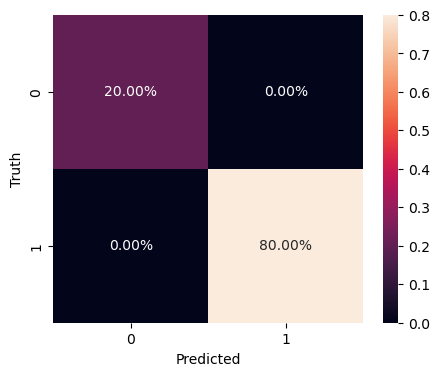

In [194]:
# Build confusion matrix
output_predict = knn.predict(input_test)
# confusion_matrix(truth,prediction)
cm = confusion_matrix(output_test , output_predict)
plt.figure(figsize=(5,4))
sn.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.savefig('NNnonLinearlySepConf.png')
print(classification_report(output_test , output_predict))

In [195]:
a = np.arange(start=input_train.iloc[:,0].min()-1, stop=input_train.iloc[:,0].max()+1, step=0.1)
b = np.arange(start=input_train.iloc[:,1].min()-1, stop=input_train.iloc[:,1].max()+1, step=0.1)

XX_train , YY_train = np.meshgrid(a,b)
train_input_array = np.array([XX_train.ravel(),YY_train.ravel()]).T

C:\Users\bryso\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


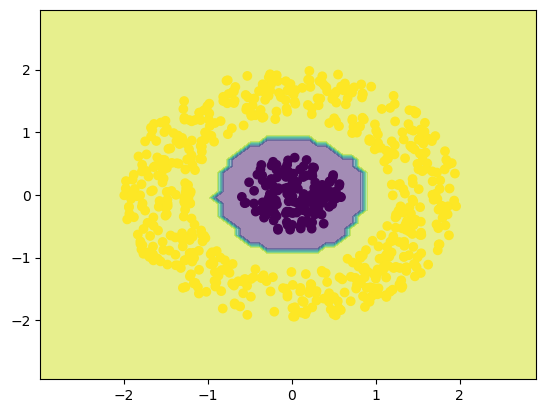

In [196]:
train_labels = knn.predict(train_input_array)
plt.contourf(XX_train,YY_train,train_labels.reshape(XX_train.shape), alpha = 0.5)
plt.scatter(input_train['Col_1'],input_train['Col_2'],c = output_train)
plt.savefig('NNnonLinearlySepTrain.png')

In [197]:
a = np.arange(start=input_test.iloc[:,0].min()-1, stop=input_test.iloc[:,0].max()+1, step=0.1)
b = np.arange(start=input_test.iloc[:,1].min()-1, stop=input_test.iloc[:,1].max()+1, step=0.1)

C:\Users\bryso\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


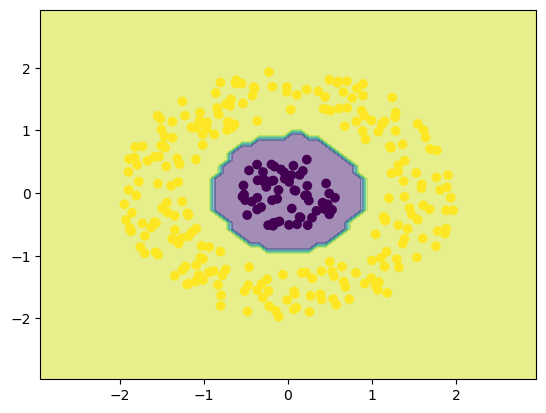

In [198]:
XX_test , YY_test = np.meshgrid(a,b)
test_input_array = np.array([XX_test.ravel(),YY_test.ravel()]).T
test_labels = knn.predict(test_input_array)
plt.contourf(XX_test,YY_test,test_labels.reshape(XX_test.shape), alpha = 0.5)
plt.scatter(input_test['Col_1'],input_test['Col_2'],c = output_test)
plt.savefig('NNnonLinearlySepTest.png')

#

**Overlapping data**

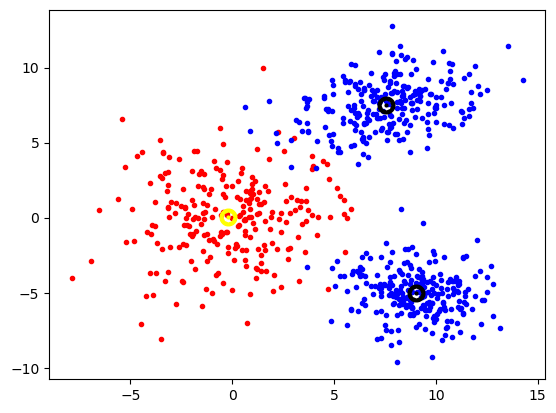

In [203]:
# Import training datasets
class_1_train = pd.read_csv('overlapping/class1_train.txt', sep = ' ', names = ['Col_1','Col_2'])
class_1_train['Class'] = 0
class_2_train = pd.read_csv('overlapping/class2_train.txt', sep = ' ', names = ['Col_1','Col_2'])
class_2_train['Class'] = 1
class_3_train = pd.read_csv('overlapping/class3_train.txt', sep = ' ', names = ['Col_1','Col_2'])
class_3_train['Class'] = 2

# Merge all the classes to create a single dataset
train_arr = [class_1_train, class_2_train, class_3_train]
train = pd.concat(train_arr, ignore_index = True)

# Plot for class 1 and its mean
plt.scatter(class_1_train['Col_1'], class_1_train['Col_2'], color = "red", marker = ".")
plt.scatter(class_1_train['Col_1'].mean() , class_1_train['Col_2'].mean() , color = "yellow", marker = "." , linewidth = 10)

# Plot for class 2 and its mean
plt.scatter(class_2_train['Col_1'], class_2_train['Col_2'], color = "blue", marker = ".")
plt.scatter(class_2_train['Col_1'].mean() , class_2_train['Col_2'].mean() , color = "black", marker = "." , linewidth = 10)

# Plot for class 3 and its mean
plt.scatter(class_3_train['Col_1'], class_3_train['Col_2'], color = "blue", marker = ".")
plt.scatter(class_3_train['Col_1'].mean() , class_3_train['Col_2'].mean() , color = "black", marker = "." , linewidth = 10)
plt.savefig('NNOverlapping.png')

# Seperating input and output for classifier
input_train = train.drop(['Class'], axis='columns')
output_train = train.Class

input_test = test.drop(['Class'], axis='columns')
output_test = test.Class

In [204]:
# Import validation datasets
class_1_val = pd.read_csv('overlapping/class1_val.txt', sep = ' ', names = ['Col_1','Col_2'])
class_1_val['Class'] = 0
class_2_val = pd.read_csv('overlapping/class2_val.txt', sep = ' ', names = ['Col_1','Col_2'])
class_2_val['Class'] = 1
class_3_val = pd.read_csv('overlapping/class3_val.txt', sep = ' ', names = ['Col_1','Col_2'])
class_3_val['Class'] = 2

# Merge all the classes to create a single dataset
val = pd.concat((class_1_val, class_2_val, class_3_val), ignore_index = True)

# Import testing dataset
class_1_test = pd.read_csv('overlapping/class1_test.txt', sep = ' ', names = ['Col_1','Col_2'])
class_1_test['Class'] = 0
class_2_test = pd.read_csv('overlapping/class2_test.txt', sep = ' ', names = ['Col_1','Col_2'])
class_2_test['Class'] = 1
class_3_test = pd.read_csv('overlapping/class3_test.txt', sep = ' ', names = ['Col_1','Col_2'])
class_3_test['Class'] = 2

# Merge all the classes to create a single dataset
test = pd.concat((class_1_test, class_2_test, class_3_test), ignore_index = True)

In [205]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
K=1 #nearest neighbour classifier
knn = KNeighborsClassifier(n_neighbors=K)

KNeighborsClassifier(n_neighbors=1)
score:  0.64
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       100
           1       0.49      0.98      0.65       100
           2       0.00      0.00      0.00       100

    accuracy                           0.64       300
   macro avg       0.48      0.64      0.53       300
weighted avg       0.48      0.64      0.53       300



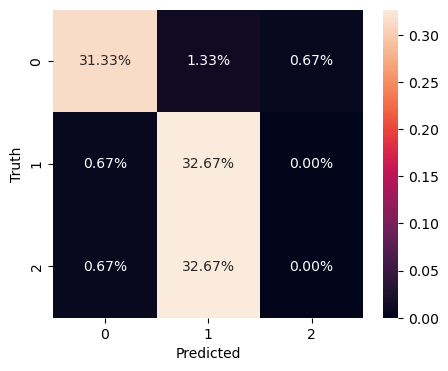

In [206]:
print(knn.fit(input_train , output_train))
print("score: ",knn.score(input_test , output_test))
# Build confusion matrix
output_predict = knn.predict(input_test)
# confusion_matrix(truth,prediction)
cm = confusion_matrix(output_test , output_predict)
plt.figure(figsize=(5,4))
sn.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.savefig('NNnonLinearlySepConf.png')
print(classification_report(output_test , output_predict))

C:\Users\bryso\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


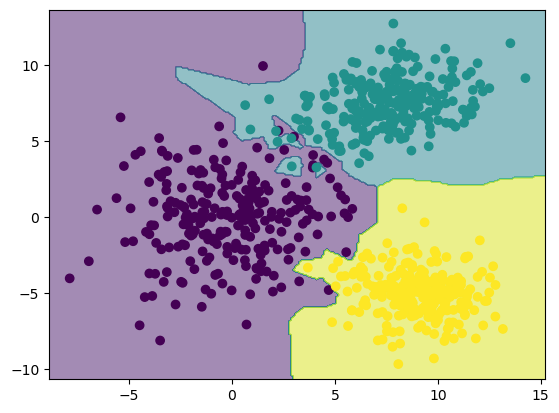

In [207]:
a = np.arange(start=input_train.iloc[:,0].min()-1, stop=input_train.iloc[:,0].max()+1, step=0.1)
b = np.arange(start=input_train.iloc[:,1].min()-1, stop=input_train.iloc[:,1].max()+1, step=0.1)

XX_train , YY_train = np.meshgrid(a,b)
train_input_array = np.array([XX_train.ravel(),YY_train.ravel()]).T
train_labels = knn.predict(train_input_array)
plt.contourf(XX_train,YY_train,train_labels.reshape(XX_train.shape), alpha = 0.5)
plt.scatter(input_train['Col_1'],input_train['Col_2'],c = output_train)
plt.savefig('NNOverlappingTrain.png')

C:\Users\bryso\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


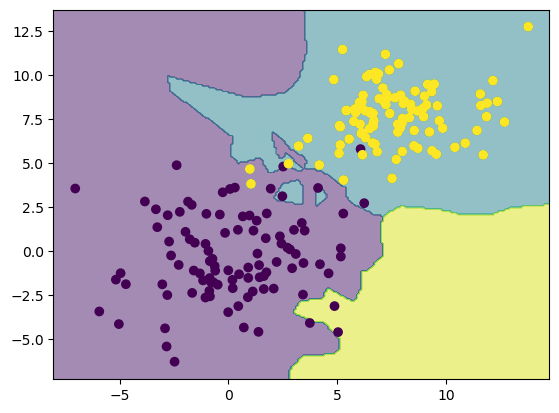

In [208]:
a = np.arange(start=input_test.iloc[:,0].min()-1, stop=input_test.iloc[:,0].max()+1, step=0.1)
b = np.arange(start=input_test.iloc[:,1].min()-1, stop=input_test.iloc[:,1].max()+1, step=0.1)
XX_test , YY_test = np.meshgrid(a,b)
test_input_array = np.array([XX_test.ravel(),YY_test.ravel()]).T
test_labels = knn.predict(test_input_array)
plt.contourf(XX_test,YY_test,test_labels.reshape(XX_test.shape), alpha = 0.5)
plt.scatter(input_test['Col_1'],input_test['Col_2'],c = output_test)
plt.savefig('NNOverlappingTest.png')